**1. In this notebook we illustrate the deviations of the CA atoms in the SARS-CoV-2 Wild-Type spike for the LA-Bound condition at pH 5 for each monomer in the spike (Monomer A, B and C). We illustrate the deviations at 0.1 ns, 1.0 ns, 5.0 ns, and 10.0 ns, and also highlight the standard error bar in red.**

**1.1 The Deviation at 0.1 ns LA-Bound pH 5**

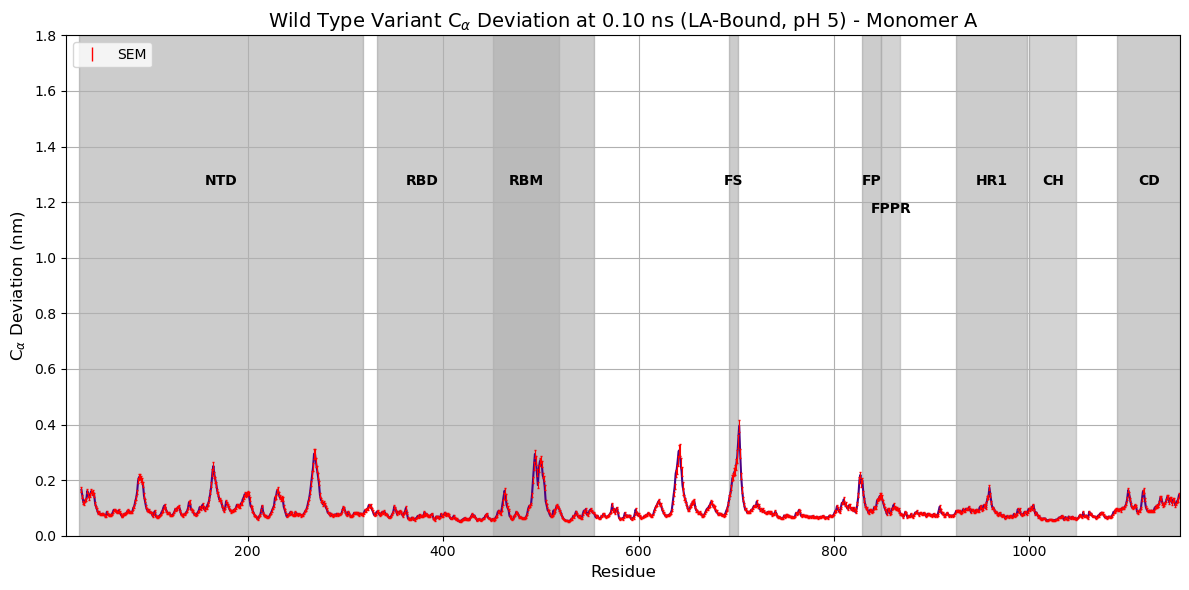

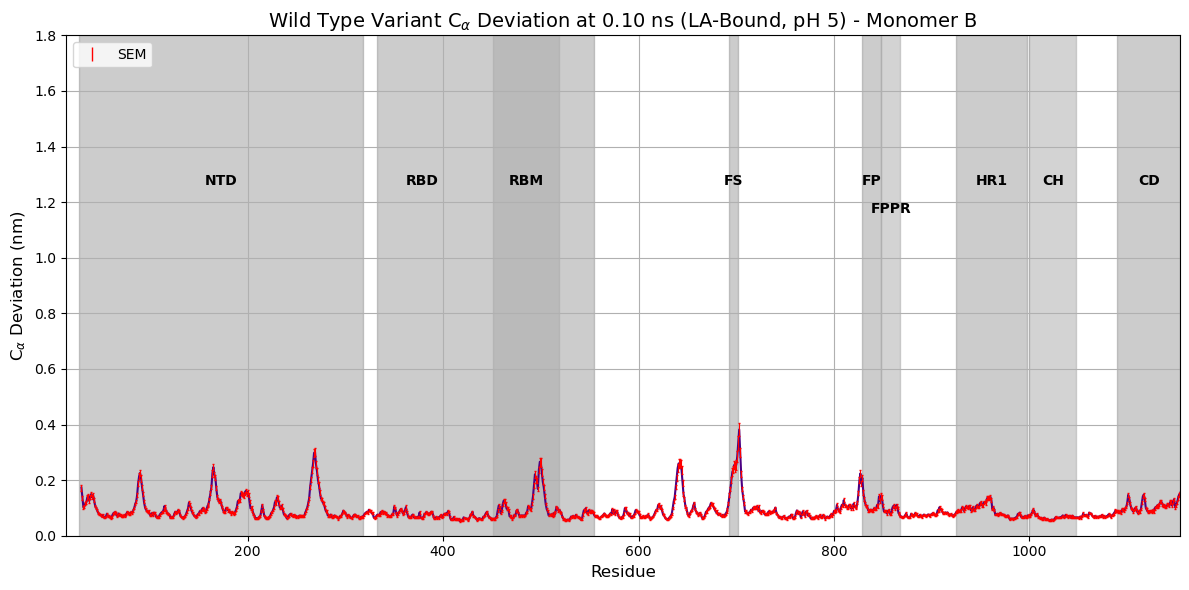

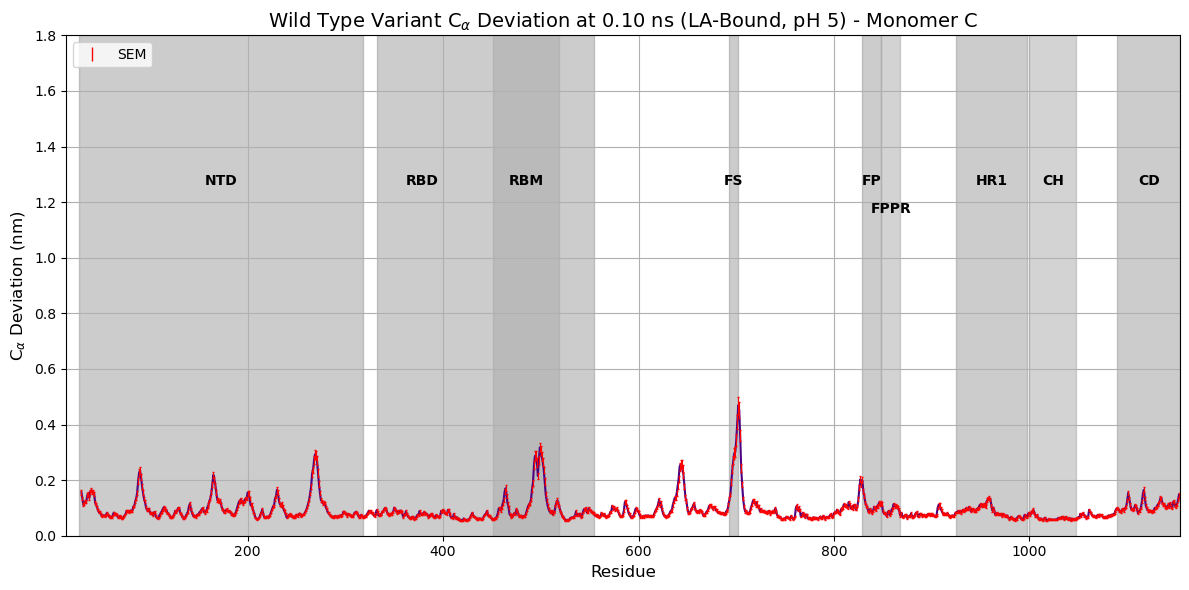

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.lines as mlines

# Load the data from the file, skipping the header lines
file_path = 'SD_100'  
data = pd.read_csv(file_path, delim_whitespace=True, skiprows=4, usecols=[0, 1, 4], names=['CA', 'CA Deviation', 'SEM'])

# Calculate the number of residues per monomer
residues_per_monomer = 1128

# Initialize dictionaries to store CA Deviation and SEM data for each monomer
monomer_data = {
    'A': data.loc[0:residues_per_monomer - 1, 'CA Deviation'],
    'B': data.loc[residues_per_monomer:2 * residues_per_monomer - 1, 'CA Deviation'],
    'C': data.loc[2 * residues_per_monomer:3 * residues_per_monomer - 1, 'CA Deviation']
}

monomer_sem_data = {
    'A': data.loc[0:residues_per_monomer - 1, 'SEM'],
    'B': data.loc[residues_per_monomer:2 * residues_per_monomer - 1, 'SEM'],
    'C': data.loc[2 * residues_per_monomer:3 * residues_per_monomer - 1, 'SEM']
}

# Prepare the data for plotting
# Add 28 to each residue number to shift the plot
residue_numbers = pd.Series(range(1, residues_per_monomer + 1)) + 29

# Create a DataFrame for easy plotting
plot_data = pd.DataFrame({
    'Residue Number': residue_numbers,
    'Monomer A': monomer_data['A'].values,
    'Monomer B': monomer_data['B'].values,
    'Monomer C': monomer_data['C'].values,
    'Monomer A SEM': monomer_sem_data['A'].values,
    'Monomer B SEM': monomer_sem_data['B'].values,
    'Monomer C SEM': monomer_sem_data['C'].values
})

# Define the domain regions
regions = [
    (14, 305, 'NTD'),
    (319, 541, 'RBD'),
    (438, 506, 'RBM'),
    (680, 689, 'FS'),
    (816, 835, 'FP'),
    (835, 855, 'FPPR'),
    (912, 984, 'HR1'),
    (987, 1035, 'CH'),
    (1077, 1141, 'CD')
]

def add_domain_regions(ax):
    for start, end, label in regions:
        if label in ['RBM', 'FPPR', 'CH']:
            ax.axvspan(start + 13, end + 13, color='darkgray', alpha=0.5)  # Shift regions by 13
        else:
            ax.axvspan(start + 13, end + 13, color='gray', alpha=0.4)  # Shift regions by 13

    for start, end, label in regions:
        if label == 'RBD':
            ax.text(start + 30 + 13, 1.25, label, ha='left', va='bottom', fontsize=10, fontweight='bold', rotation=0, color='black')
        elif label == 'RBM':
            ax.text((start + end) / 2 + 13, 1.25, label, ha='center', va='bottom', fontsize=10, fontweight='bold', rotation=0, color='black')
        elif label == 'FP':
            ax.text((start + end) / 2 + 13, 1.25, label, ha='center', va='bottom', fontsize=10, fontweight='bold', rotation=0, color='black')
        elif label == 'FPPR':
            ax.text((start + end) / 2 + 13, 1.15, label, ha='center', va='bottom', fontsize=10, fontweight='bold', rotation=0, color='black')
        elif label == 'CH':
            ax.text((start + end) / 2 + 13, 1.25, label, ha='center', va='bottom', fontsize=10, fontweight='bold', rotation=0, color='black')
        else:
            ax.text((start + end) / 2 + 13, 1.25, label, ha='center', va='bottom', fontsize=10, fontweight='bold', rotation=0, color='black')

# Function to create the plot for each monomer
def plot_monomer(data, monomer, sem, title, output_file):
    plt.figure(figsize=(12, 6))
    ax = sns.lineplot(data=data, x='Residue Number', y=f'Monomer {monomer}', color='#4b0082')
    
    # Add error bars for SEM in red
    plt.errorbar(data['Residue Number'], data[f'Monomer {monomer}'], yerr=data[f'Monomer {sem}'], 
                 fmt='none', ecolor='red', elinewidth=0.8, capsize=0.8)
    
    # Add the domain regions
    add_domain_regions(ax)
    
    # Create a custom legend handle for SEM
    sem_legend = mlines.Line2D([], [], color='red', marker='|', linestyle='None', markersize=10, label='SEM')
    
    plt.title(title, fontsize=14)
    plt.xlabel('Residue', fontsize=12)
    plt.ylabel('C$_{\\alpha}$ Deviation (nm)', fontsize=12)
    plt.xlim([14, 1141 + 13])  # Adjust x-axis limit according to the shift
    plt.ylim([0, 1.8])
    plt.grid(True)
    plt.legend(handles=[sem_legend], loc='upper left')  # Include only the SEM in the legend
    plt.tight_layout()
    plt.savefig(output_file)
    plt.show()

# Plotting for Monomer A, B, and C
plot_monomer(plot_data, 'A', 'A SEM', 'Wild Type Variant C$_{\\alpha}$ Deviation at 0.10 ns (LA-Bound, pH 5) - Monomer A', 'ca_deviation_10ns_apo_monomer_A_pH10.png')
plot_monomer(plot_data, 'B', 'B SEM', 'Wild Type Variant C$_{\\alpha}$ Deviation at 0.10 ns (LA-Bound, pH 5) - Monomer B', 'ca_deviation_10ns_apo_monomer_B_pH10.png')
plot_monomer(plot_data, 'C', 'C SEM', 'Wild Type Variant C$_{\\alpha}$ Deviation at 0.10 ns (LA-Bound, pH 5) - Monomer C', 'ca_deviation_10ns_apo_monomer_C_pH10.png')

**1.2 The Deviation at 1.0 ns LA-Bound pH 5**

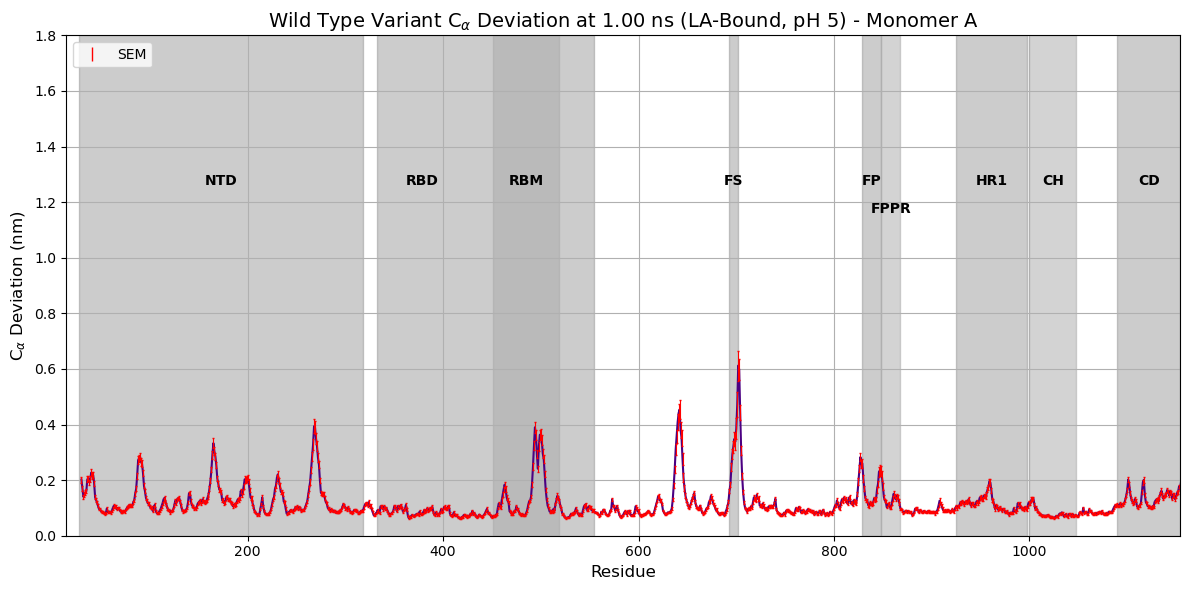

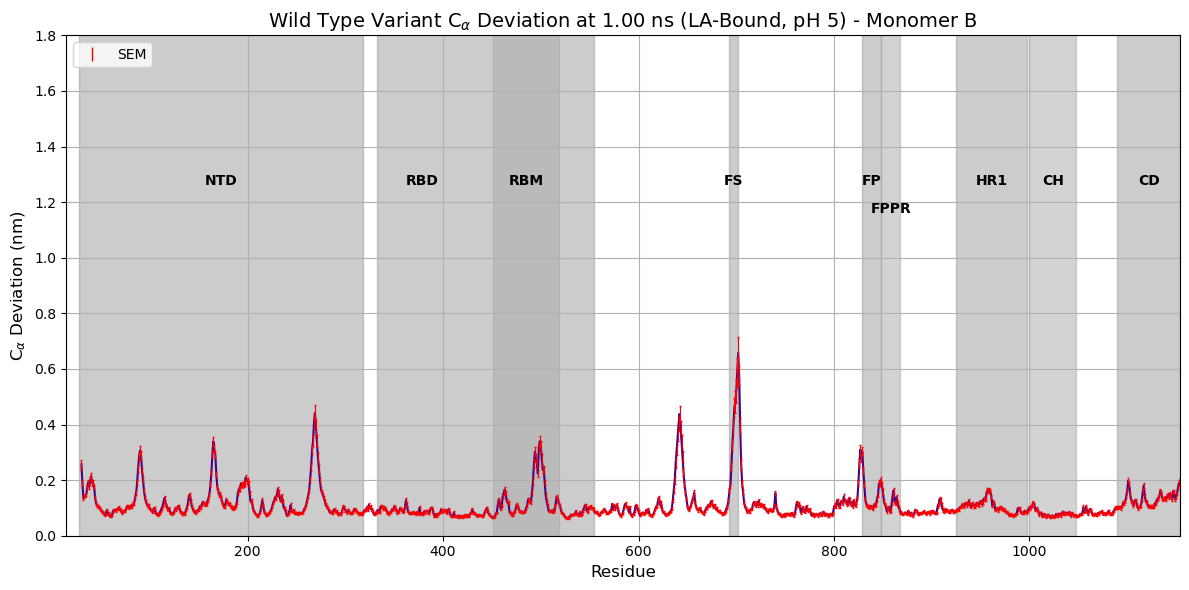

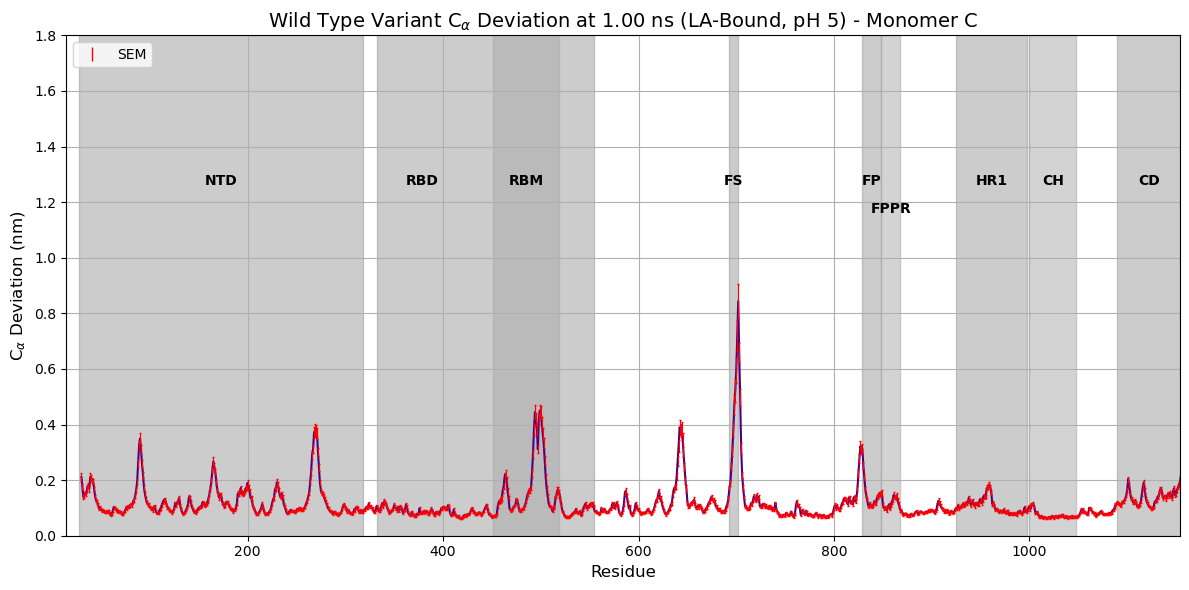

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.lines as mlines

# Load the data from the file, skipping the header lines
file_path = 'SD_1000'  
data = pd.read_csv(file_path, delim_whitespace=True, skiprows=4, usecols=[0, 1, 4], names=['CA', 'CA Deviation', 'SEM'])

# Calculate the number of residues per monomer
residues_per_monomer = 1128

# Initialize dictionaries to store CA Deviation and SEM data for each monomer
monomer_data = {
    'A': data.loc[0:residues_per_monomer - 1, 'CA Deviation'],
    'B': data.loc[residues_per_monomer:2 * residues_per_monomer - 1, 'CA Deviation'],
    'C': data.loc[2 * residues_per_monomer:3 * residues_per_monomer - 1, 'CA Deviation']
}

monomer_sem_data = {
    'A': data.loc[0:residues_per_monomer - 1, 'SEM'],
    'B': data.loc[residues_per_monomer:2 * residues_per_monomer - 1, 'SEM'],
    'C': data.loc[2 * residues_per_monomer:3 * residues_per_monomer - 1, 'SEM']
}

# Prepare the data for plotting
# Add 28 to each residue number to shift the plot
residue_numbers = pd.Series(range(1, residues_per_monomer + 1)) + 29

# Create a DataFrame for easy plotting
plot_data = pd.DataFrame({
    'Residue Number': residue_numbers,
    'Monomer A': monomer_data['A'].values,
    'Monomer B': monomer_data['B'].values,
    'Monomer C': monomer_data['C'].values,
    'Monomer A SEM': monomer_sem_data['A'].values,
    'Monomer B SEM': monomer_sem_data['B'].values,
    'Monomer C SEM': monomer_sem_data['C'].values
})

# Define the domain regions
regions = [
    (14, 305, 'NTD'),
    (319, 541, 'RBD'),
    (438, 506, 'RBM'),
    (680, 689, 'FS'),
    (816, 835, 'FP'),
    (835, 855, 'FPPR'),
    (912, 984, 'HR1'),
    (987, 1035, 'CH'),
    (1077, 1141, 'CD')
]

def add_domain_regions(ax):
    for start, end, label in regions:
        if label in ['RBM', 'FPPR', 'CH']:
            ax.axvspan(start + 13, end + 13, color='darkgray', alpha=0.5)  # Shift regions by 13
        else:
            ax.axvspan(start + 13, end + 13, color='gray', alpha=0.4)  # Shift regions by 13

    for start, end, label in regions:
        if label == 'RBD':
            ax.text(start + 30 + 13, 1.25, label, ha='left', va='bottom', fontsize=10, fontweight='bold', rotation=0, color='black')
        elif label == 'RBM':
            ax.text((start + end) / 2 + 13, 1.25, label, ha='center', va='bottom', fontsize=10, fontweight='bold', rotation=0, color='black')
        elif label == 'FP':
            ax.text((start + end) / 2 + 13, 1.25, label, ha='center', va='bottom', fontsize=10, fontweight='bold', rotation=0, color='black')
        elif label == 'FPPR':
            ax.text((start + end) / 2 + 13, 1.15, label, ha='center', va='bottom', fontsize=10, fontweight='bold', rotation=0, color='black')
        elif label == 'CH':
            ax.text((start + end) / 2 + 13, 1.25, label, ha='center', va='bottom', fontsize=10, fontweight='bold', rotation=0, color='black')
        else:
            ax.text((start + end) / 2 + 13, 1.25, label, ha='center', va='bottom', fontsize=10, fontweight='bold', rotation=0, color='black')

# Function to create the plot for each monomer
def plot_monomer(data, monomer, sem, title, output_file):
    plt.figure(figsize=(12, 6))
    ax = sns.lineplot(data=data, x='Residue Number', y=f'Monomer {monomer}', color='#4b0082')
    
    # Add error bars for SEM in red
    plt.errorbar(data['Residue Number'], data[f'Monomer {monomer}'], yerr=data[f'Monomer {sem}'], 
                 fmt='none', ecolor='red', elinewidth=0.8, capsize=0.8)
    
    # Add the domain regions
    add_domain_regions(ax)
    
    # Create a custom legend handle for SEM
    sem_legend = mlines.Line2D([], [], color='red', marker='|', linestyle='None', markersize=10, label='SEM')
    
    plt.title(title, fontsize=14)
    plt.xlabel('Residue', fontsize=12)
    plt.ylabel('C$_{\\alpha}$ Deviation (nm)', fontsize=12)
    plt.xlim([14, 1141 + 13])  # Adjust x-axis limit according to the shift
    plt.ylim([0, 1.8])
    plt.grid(True)
    plt.legend(handles=[sem_legend], loc='upper left')  # Include only the SEM in the legend
    plt.tight_layout()
    plt.savefig(output_file)
    plt.show()

# Plotting for Monomer A, B, and C
plot_monomer(plot_data, 'A', 'A SEM', 'Wild Type Variant C$_{\\alpha}$ Deviation at 1.00 ns (LA-Bound, pH 5) - Monomer A', 'ca_deviation_10ns_apo_monomer_A_pH10.png')
plot_monomer(plot_data, 'B', 'B SEM', 'Wild Type Variant C$_{\\alpha}$ Deviation at 1.00 ns (LA-Bound, pH 5) - Monomer B', 'ca_deviation_10ns_apo_monomer_B_pH10.png')
plot_monomer(plot_data, 'C', 'C SEM', 'Wild Type Variant C$_{\\alpha}$ Deviation at 1.00 ns (LA-Bound, pH 5) - Monomer C', 'ca_deviation_10ns_apo_monomer_C_pH10.png')

**1.3 The Deviation at 5 ns LA-Bound pH 5**

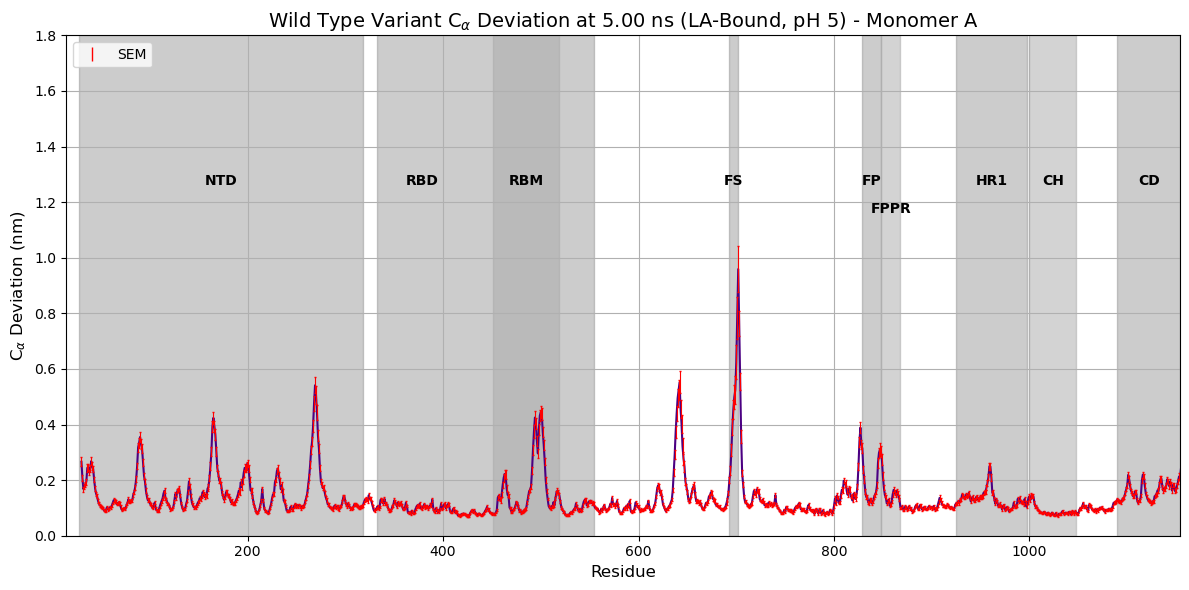

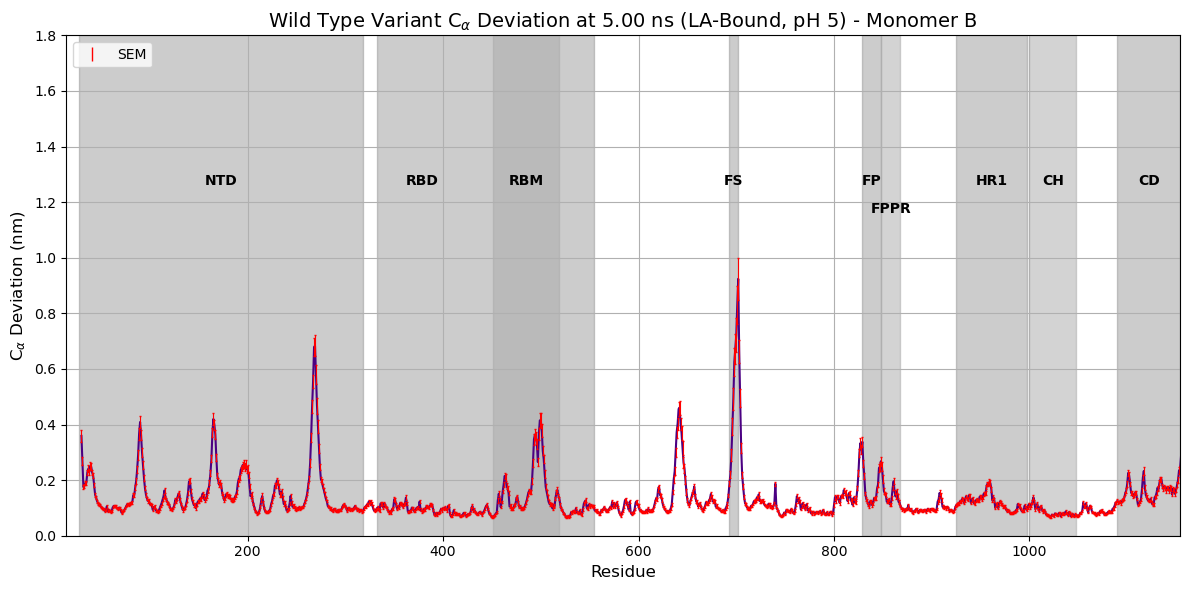

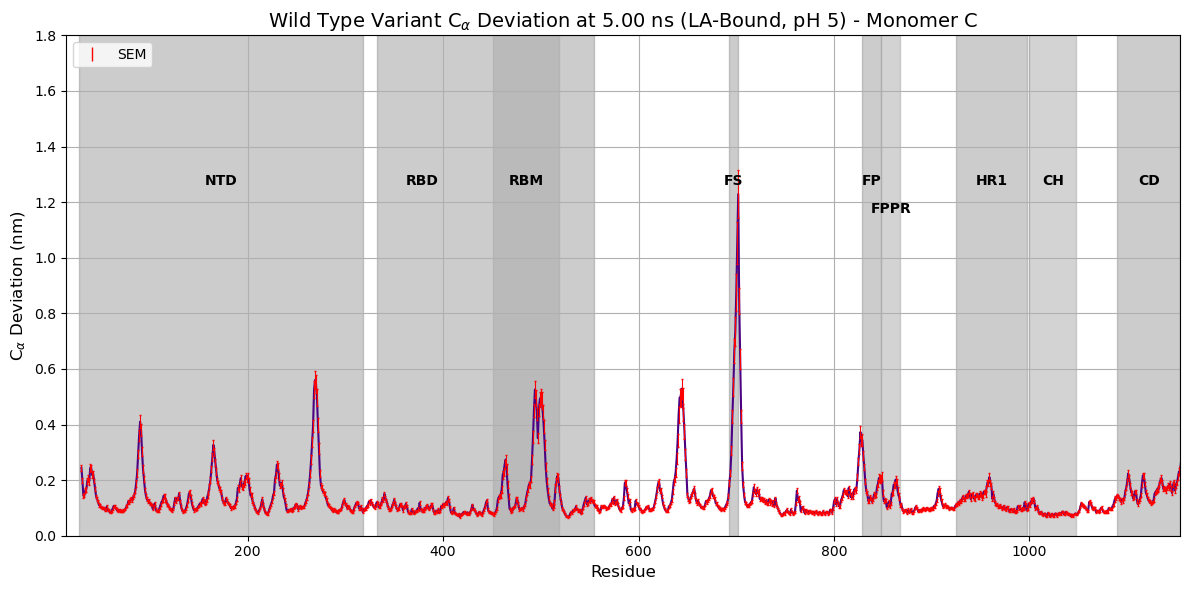

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.lines as mlines

# Load the data from the file, skipping the header lines
file_path = 'SD_5000'  
data = pd.read_csv(file_path, delim_whitespace=True, skiprows=4, usecols=[0, 1, 4], names=['CA', 'CA Deviation', 'SEM'])

# Calculate the number of residues per monomer
residues_per_monomer = 1128

# Initialize dictionaries to store CA Deviation and SEM data for each monomer
monomer_data = {
    'A': data.loc[0:residues_per_monomer - 1, 'CA Deviation'],
    'B': data.loc[residues_per_monomer:2 * residues_per_monomer - 1, 'CA Deviation'],
    'C': data.loc[2 * residues_per_monomer:3 * residues_per_monomer - 1, 'CA Deviation']
}

monomer_sem_data = {
    'A': data.loc[0:residues_per_monomer - 1, 'SEM'],
    'B': data.loc[residues_per_monomer:2 * residues_per_monomer - 1, 'SEM'],
    'C': data.loc[2 * residues_per_monomer:3 * residues_per_monomer - 1, 'SEM']
}

# Prepare the data for plotting
# Add 28 to each residue number to shift the plot
residue_numbers = pd.Series(range(1, residues_per_monomer + 1)) + 29

# Create a DataFrame for easy plotting
plot_data = pd.DataFrame({
    'Residue Number': residue_numbers,
    'Monomer A': monomer_data['A'].values,
    'Monomer B': monomer_data['B'].values,
    'Monomer C': monomer_data['C'].values,
    'Monomer A SEM': monomer_sem_data['A'].values,
    'Monomer B SEM': monomer_sem_data['B'].values,
    'Monomer C SEM': monomer_sem_data['C'].values
})

# Define the domain regions
regions = [
    (14, 305, 'NTD'),
    (319, 541, 'RBD'),
    (438, 506, 'RBM'),
    (680, 689, 'FS'),
    (816, 835, 'FP'),
    (835, 855, 'FPPR'),
    (912, 984, 'HR1'),
    (987, 1035, 'CH'),
    (1077, 1141, 'CD')
]

def add_domain_regions(ax):
    for start, end, label in regions:
        if label in ['RBM', 'FPPR', 'CH']:
            ax.axvspan(start + 13, end + 13, color='darkgray', alpha=0.5)  # Shift regions by 13
        else:
            ax.axvspan(start + 13, end + 13, color='gray', alpha=0.4)  # Shift regions by 13

    for start, end, label in regions:
        if label == 'RBD':
            ax.text(start + 30 + 13, 1.25, label, ha='left', va='bottom', fontsize=10, fontweight='bold', rotation=0, color='black')
        elif label == 'RBM':
            ax.text((start + end) / 2 + 13, 1.25, label, ha='center', va='bottom', fontsize=10, fontweight='bold', rotation=0, color='black')
        elif label == 'FP':
            ax.text((start + end) / 2 + 13, 1.25, label, ha='center', va='bottom', fontsize=10, fontweight='bold', rotation=0, color='black')
        elif label == 'FPPR':
            ax.text((start + end) / 2 + 13, 1.15, label, ha='center', va='bottom', fontsize=10, fontweight='bold', rotation=0, color='black')
        elif label == 'CH':
            ax.text((start + end) / 2 + 13, 1.25, label, ha='center', va='bottom', fontsize=10, fontweight='bold', rotation=0, color='black')
        else:
            ax.text((start + end) / 2 + 13, 1.25, label, ha='center', va='bottom', fontsize=10, fontweight='bold', rotation=0, color='black')

# Function to create the plot for each monomer
def plot_monomer(data, monomer, sem, title, output_file):
    plt.figure(figsize=(12, 6))
    ax = sns.lineplot(data=data, x='Residue Number', y=f'Monomer {monomer}', color='#4b0082')
    
    # Add error bars for SEM in red
    plt.errorbar(data['Residue Number'], data[f'Monomer {monomer}'], yerr=data[f'Monomer {sem}'], 
                 fmt='none', ecolor='red', elinewidth=0.8, capsize=0.8)
    
    # Add the domain regions
    add_domain_regions(ax)
    
    # Create a custom legend handle for SEM
    sem_legend = mlines.Line2D([], [], color='red', marker='|', linestyle='None', markersize=10, label='SEM')
    
    plt.title(title, fontsize=14)
    plt.xlabel('Residue', fontsize=12)
    plt.ylabel('C$_{\\alpha}$ Deviation (nm)', fontsize=12)
    plt.xlim([14, 1141 + 13])  # Adjust x-axis limit according to the shift
    plt.ylim([0, 1.8])
    plt.grid(True)
    plt.legend(handles=[sem_legend], loc='upper left')  # Include only the SEM in the legend
    plt.tight_layout()
    plt.savefig(output_file)
    plt.show()

# Plotting for Monomer A, B, and C
plot_monomer(plot_data, 'A', 'A SEM', 'Wild Type Variant C$_{\\alpha}$ Deviation at 5.00 ns (LA-Bound, pH 5) - Monomer A', 'ca_deviation_10ns_apo_monomer_A_pH10.png')
plot_monomer(plot_data, 'B', 'B SEM', 'Wild Type Variant C$_{\\alpha}$ Deviation at 5.00 ns (LA-Bound, pH 5) - Monomer B', 'ca_deviation_10ns_apo_monomer_B_pH10.png')
plot_monomer(plot_data, 'C', 'C SEM', 'Wild Type Variant C$_{\\alpha}$ Deviation at 5.00 ns (LA-Bound, pH 5) - Monomer C', 'ca_deviation_10ns_apo_monomer_C_pH10.png')

**1.4 The Deviation at 10ns LA-Bound pH 5**

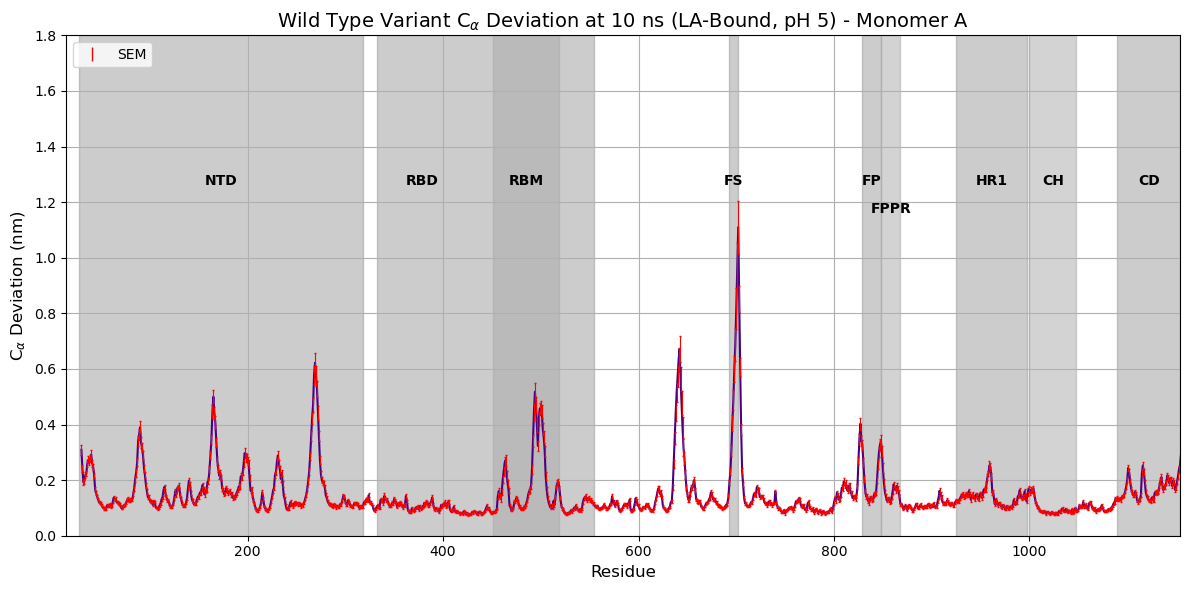

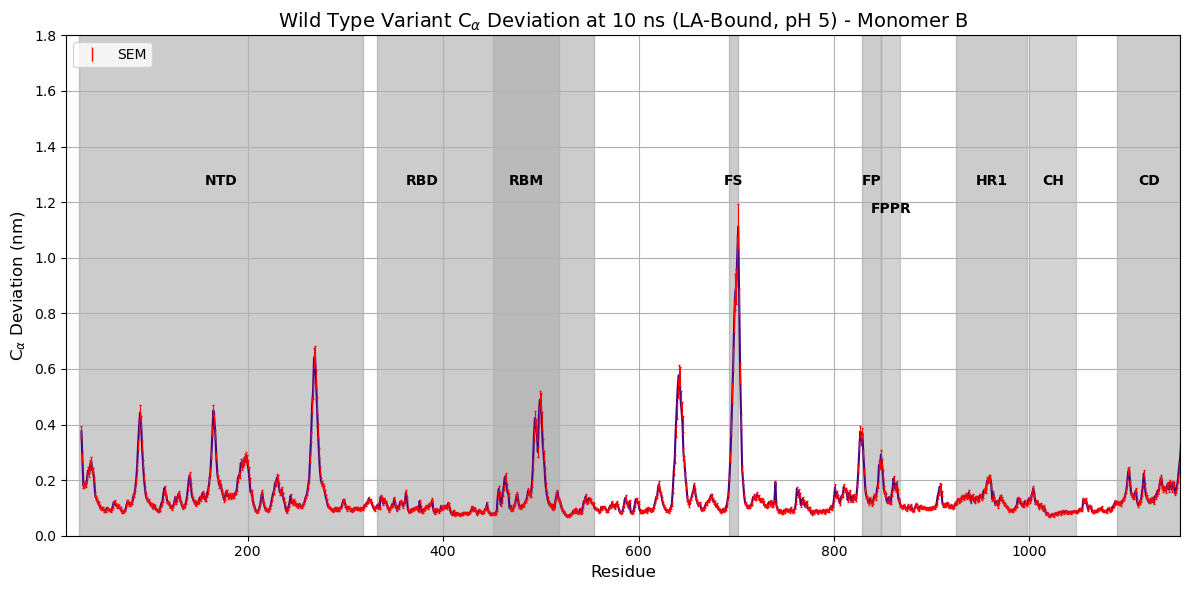

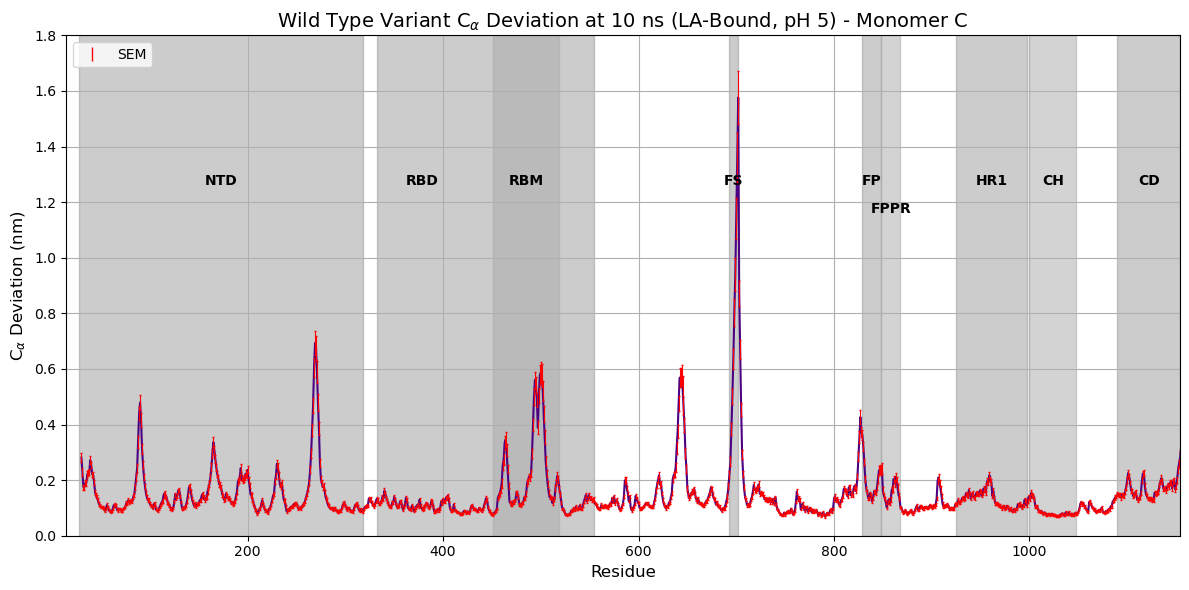

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.lines as mlines

# Load the data from the file, skipping the header lines
file_path = 'SD_10000'  
data = pd.read_csv(file_path, delim_whitespace=True, skiprows=4, usecols=[0, 1, 4], names=['CA', 'CA Deviation', 'SEM'])

# Calculate the number of residues per monomer
residues_per_monomer = 1128

# Initialize dictionaries to store CA Deviation and SEM data for each monomer
monomer_data = {
    'A': data.loc[0:residues_per_monomer - 1, 'CA Deviation'],
    'B': data.loc[residues_per_monomer:2 * residues_per_monomer - 1, 'CA Deviation'],
    'C': data.loc[2 * residues_per_monomer:3 * residues_per_monomer - 1, 'CA Deviation']
}

monomer_sem_data = {
    'A': data.loc[0:residues_per_monomer - 1, 'SEM'],
    'B': data.loc[residues_per_monomer:2 * residues_per_monomer - 1, 'SEM'],
    'C': data.loc[2 * residues_per_monomer:3 * residues_per_monomer - 1, 'SEM']
}

# Prepare the data for plotting
# Add 28 to each residue number to shift the plot
residue_numbers = pd.Series(range(1, residues_per_monomer + 1)) + 29

# Create a DataFrame for easy plotting
plot_data = pd.DataFrame({
    'Residue Number': residue_numbers,
    'Monomer A': monomer_data['A'].values,
    'Monomer B': monomer_data['B'].values,
    'Monomer C': monomer_data['C'].values,
    'Monomer A SEM': monomer_sem_data['A'].values,
    'Monomer B SEM': monomer_sem_data['B'].values,
    'Monomer C SEM': monomer_sem_data['C'].values
})

# Define the domain regions
regions = [
    (14, 305, 'NTD'),
    (319, 541, 'RBD'),
    (438, 506, 'RBM'),
    (680, 689, 'FS'),
    (816, 835, 'FP'),
    (835, 855, 'FPPR'),
    (912, 984, 'HR1'),
    (987, 1035, 'CH'),
    (1077, 1141, 'CD')
]

def add_domain_regions(ax):
    for start, end, label in regions:
        if label in ['RBM', 'FPPR', 'CH']:
            ax.axvspan(start + 13, end + 13, color='darkgray', alpha=0.5)  # Shift regions by 13
        else:
            ax.axvspan(start + 13, end + 13, color='gray', alpha=0.4)  # Shift regions by 13

    for start, end, label in regions:
        if label == 'RBD':
            ax.text(start + 30 + 13, 1.25, label, ha='left', va='bottom', fontsize=10, fontweight='bold', rotation=0, color='black')
        elif label == 'RBM':
            ax.text((start + end) / 2 + 13, 1.25, label, ha='center', va='bottom', fontsize=10, fontweight='bold', rotation=0, color='black')
        elif label == 'FP':
            ax.text((start + end) / 2 + 13, 1.25, label, ha='center', va='bottom', fontsize=10, fontweight='bold', rotation=0, color='black')
        elif label == 'FPPR':
            ax.text((start + end) / 2 + 13, 1.15, label, ha='center', va='bottom', fontsize=10, fontweight='bold', rotation=0, color='black')
        elif label == 'CH':
            ax.text((start + end) / 2 + 13, 1.25, label, ha='center', va='bottom', fontsize=10, fontweight='bold', rotation=0, color='black')
        else:
            ax.text((start + end) / 2 + 13, 1.25, label, ha='center', va='bottom', fontsize=10, fontweight='bold', rotation=0, color='black')

# Function to create the plot for each monomer
def plot_monomer(data, monomer, sem, title, output_file):
    plt.figure(figsize=(12, 6))
    ax = sns.lineplot(data=data, x='Residue Number', y=f'Monomer {monomer}', color='#4b0082')
    
    # Add error bars for SEM in red
    plt.errorbar(data['Residue Number'], data[f'Monomer {monomer}'], yerr=data[f'Monomer {sem}'], 
                 fmt='none', ecolor='red', elinewidth=0.8, capsize=0.8)
    
    # Add the domain regions
    add_domain_regions(ax)
    
    # Create a custom legend handle for SEM
    sem_legend = mlines.Line2D([], [], color='red', marker='|', linestyle='None', markersize=10, label='SEM')
    
    plt.title(title, fontsize=14)
    plt.xlabel('Residue', fontsize=12)
    plt.ylabel('C$_{\\alpha}$ Deviation (nm)', fontsize=12)
    plt.xlim([14, 1141 + 13])  # Adjust x-axis limit according to the shift
    plt.ylim([0, 1.8])
    plt.grid(True)
    plt.legend(handles=[sem_legend], loc='upper left')  # Include only the SEM in the legend
    plt.tight_layout()
    plt.savefig(output_file)
    plt.show()

# Plotting for Monomer A, B, and C
plot_monomer(plot_data, 'A', 'A SEM', 'Wild Type Variant C$_{\\alpha}$ Deviation at 10 ns (LA-Bound, pH 5) - Monomer A', 'ca_deviation_10ns_apo_monomer_A_pH10.png')
plot_monomer(plot_data, 'B', 'B SEM', 'Wild Type Variant C$_{\\alpha}$ Deviation at 10 ns (LA-Bound, pH 5) - Monomer B', 'ca_deviation_10ns_apo_monomer_B_pH10.png')
plot_monomer(plot_data, 'C', 'C SEM', 'Wild Type Variant C$_{\\alpha}$ Deviation at 10 ns (LA-Bound, pH 5) - Monomer C', 'ca_deviation_10ns_apo_monomer_C_pH10.png')